*George Calvert*, CPSC 322, Fall 2023, Final Project

# Data Discovery:

For this project I will be using two different tables of data. The first will be inpatient charges which contains the locaion of a hospital, the service provided to the paitient, and finally the average cost for the service. The second is Hospital General information which contains the location of a hospital and then ratings for different services they provide. For classification, I will be developing models to predict the region in which a certain hospital resides. This model will be trained using both continous and categorical data. The categorical data will include the Hospital;s overall rating, name, and ownership. The continous data will be the average total amount of money patients paid when visiting. This will be calculated by finding the mean of the payements for each of the hospitals intances in the dataset, ignoring which service the individual patient paid for 

### The Data Sets:

* The first data set is *[Inpatient Charges](https://www.kaggle.com/datasets/speedoheck/inpatient-hospital-charges)*.

    Which is described as:
    > Variation of hospital charges in the various hospitals in the US for the top 100 diagnoses.
    > This dataset will show you how price for the same diagnosis and the same treatment and in the same city can vary differently across different providers. It might help you or your loved one find a better hospital for your treatment. You can also analyze to detect fraud among providers.
    
    The attributes in this dataset are:

    * DRG Definition = Nominal - Service/Condition for being in hospital
    * Provider Id = Nominal - Id for the specific hospital
    * Provider Name = Nominal - Name of the Hospital 
    * Provider Street Address = Nominal - Address of the Hospital
    * Provider City = Nominal - City Hospital is Located
    * Provider State = Nominal - State Hospital is Located
    * Provider ZIP Code = Nominal - Zip Code of Hospital
    * Hospital Referall Region Description - Nominal - City/Region the Hospital provides for. Ex: "CA - Los Angeles"
    * Total number of Discharges = Interval - Discharges for the given condition in a certain hospital
    * Average Covered Charges = Interval - Amount of Money Covered for the given condition in a certain hospital
    * Average Total Payments = Interval - Average total payment for service

* The second data set is *[Hospital General Information](https://www.kaggle.com/datasets/center-for-medicare-and-medicaid/hospital-ratings?rvi=1)*.

    Which is described as:
    > The official datasets used on the Medicare.gov Hospital Compare Website provided by the Centers for Medicare & Medicaid Services. These data allow you to compare the quality of care at over 4,000 Medicare-certified hospitals across the country.

    The attributes in this data set are:
    * Provider ID = Nominal - Id for the specific hospital
    * Hospital Name = Nominal - Name of the Hospital
    * Address = Nominal - Address of the Hospital
    * City = Nominal - City Hospital is Located
    * State = Nominal - State Hospital is Located
    * ZIP Code = Nominal - Zip Code of Hospital
    * County Name = Nominal - County for specific Hospital
    * Phone Number = Nominal - Phone Number for a Hospital
    * Hospital Type = Nominal - Type of Hospital (ie. Acute Care, Critical Access)
    * Hospital Ownership = Nominal - Type of Ownership (ie. Voluntary Non-Profit, Proprietary)
    * Emergency Services = Interval - y or n if they have emergency service
    * Meets criteria for meaningful use of EHRs = Interval - y or n for having an Electronic Health record
    * Hospital overall rating = Ordinal - Rating of Hospital 1-5
    * Hospital overall rating footnote = Nominal - Explanation for rating 
    * Mortality national comparison = Nominal - Comparing to national average for Mortality (ie. Same as national average, Below Average, Above Average)
    * Mortality national comparison footnote = Nominal - Explanation
    * Safety of care national comparison = Nominal - Comparing to national average for Safety of Care (ie. Same as national average, Below Average, Above Average)
    * Safety of care national comparison footnote = Nominal - Explanation
    * Readmission national comparison = Nominal - Comparing to national average for readmission (ie. Same as national average, Below Average, Above Average)
    * Readmission national comparison footnote = Nominal - Explanation
    * Patient experience national comparison = Nominal - Comparing to national average for Patient Experience (ie. Same as national average, Below Average, Above Average)
    * Patient experience national comparison footnote = Nominal - Explanation 
    * Effectiveness of care national comparison = Nominal - Comparing to national average for Effectiveness of Care(ie. Same as national average, Below Average, Above Average)
    * Effectiveness of care national comparison footnote = Nominal - Explanation
    * Timeliness of care national comparison = Nominal - Comparing to national average for Timliness of care (ie. Same as national average, Below Average, Above Average)
    * Timeliness of care national comparison footnote = Nominal Explanation
    * Efficient use of medical imaging national comparison = Comparing to national average for Efficient use of medical imaging (ie. Same as national average, Below Average, Above Average)
    * Efficient use of medical imaging national comparison = Nominal - Explanation



I will joining these two data sets together, matching on the Hospital's name, and address. Then I will combine each reoccuring hospital into one single instance of a row,computing an average total cost for each hospital, then I will create a new attribute "region" which will be based on the state in which the hospital resides. I will then be cleaning the joined table by removing rows with missing values 

# Exploratory Analysis and Visualizations

### Loading Libraries and Data Sets

In [1]:
from decision_tree import *
from data_table import *
from data_learn import *
from data_eval import *
from data_util import *

In [2]:
inpatient_charges_table = DataTable(["DRG Definition","Provider Id","Hospital Name","Address","City",
                                    "State","ZIP Code","Hospital Referral Region Description", "Total Discharges" , 
                                    "Average Covered Charges" , "Average Total Payments ","Average Medicare Payments"])

hospital_info_table = DataTable(["Provider ID","Hospital Name","Address","City","State","ZIP Code","County Name",
                                "Phone Number","Hospital Type","Hospital Ownership","Emergency Services",
                                "Meets criteria for meaningful use of EHRs","Hospital overall rating","Hospital overall rating footnote",
                                "Mortality national comparison","Mortality national comparison footnote",
                                "Safety of care national comparison","Safety of care national comparison footnote",
                                "Readmission national comparison","Readmission national comparison footnote",
                                "Patient experience national comparison","Patient experience national comparison footnote",
                                "Effectiveness of care national comparison","Effectiveness of care national comparison footnote",
                                "Timeliness of care national comparison","Timeliness of care national comparison footnote",
                                "Efficient use of medical imaging national comparison","Efficient use of medical imaging national comparison footnote"])                               
inpatient_charges_table.load("inpatientCharges.csv")
hospital_info_table.load("Hospital General Information UTF-8.csv")

### Combining Tables on Hospital Name, Address, City, State, ZIP Code
* Not including non-matching rows

In [3]:
combined_table = DataTable.combine(inpatient_charges_table, hospital_info_table, ["Hospital Name", "Address", "City", "State", "ZIP Code"])
del combined_table[0]

### Data Set Facts:

In [4]:
print("Number Instances: ", combined_table.row_count())
print("Number Columns: ", combined_table.column_count())

Number Instances:  106683
Number Columns:  35


In [5]:
print("Number of States Represented: ", len(distinct_values(combined_table, 'State')))
print("Number of Distinct Hospitals: ", len(distinct_values(combined_table, "Hospital Name")))
print("Number Conditions Represented: ", len(distinct_values(combined_table, "DRG Definition")))

Number of States Represented:  51
Number of Distinct Hospitals:  2059
Number Conditions Represented:  100


### Visualizations

*Distribution of Hospital Ratings*

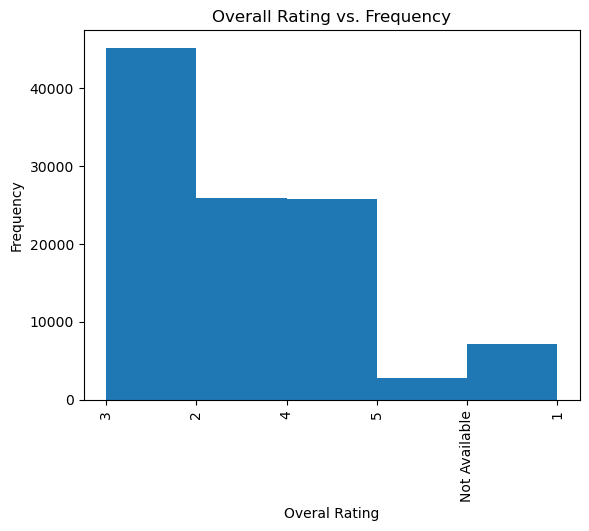

<Figure size 12000x12000 with 0 Axes>

In [6]:
histogram(combined_table, "Hospital overall rating", 5, "Overal Rating", "Frequency", "Overall Rating vs. Frequency")

*Distribution of Hopitals per Region*

In [7]:
state_table = DataTable(['State', "Average Total Payments "])
for row in combined_table:
    state_table.append([row['State'], row["Average Total Payments "]])
state_to_region_dict = {
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'NV': 'West',
    'ID': 'West', 'MT': 'West', 'WY': 'West', 'UT': 'West',
    'CO': 'West', 'AK': 'West', 'HI': 'West', 'ME': 'Northeast',
    'VT': 'Northeast', 'NY': 'Northeast', 'NH': 'Northeast',
    'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NJ': 'Northeast', 'PA': 'Northeast', 'ND': 'Midwest',
    'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest',
    'IL': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest',
    'WV': 'South', 'DC': 'South', 'MD': 'South',
    'VA': 'South', 'KY': 'South', 'TN': 'South', 'NC': 'South',
    'MS': 'South', 'AR': 'South', 'LA': 'South', 'AL': 'South',
    'GA': 'South', 'SC': 'South', 'FL': 'South', 'DE': 'South',
    'AZ': 'Southwest', 'NM': 'Southwest', 'OK': 'Southwest',
    'TX': 'Southwest'}
temp = state_table.columns()
temp.append('Region')
region_table = DataTable(temp)
for row in range(state_table.row_count()):
    vals = state_table[row].values()
    vals.append(state_to_region_dict[state_table[row]["State"]])
    region_table.append(vals)
print(region_table.rows([x for x in range(10)]))

State    Average Total Payments     Region
-------  -------------------------  --------
AL       $5777.24                   South
AL       $4894.76                   South
AL       $10260.21                  South
AL       $6542.08                   South
AL       $4596.39                   South
AL       $4134.10                   South
AL       $4876.00                   South
AL       $4667.22                   South
AL       $6020.27                   South
AL       $11634.52                  South


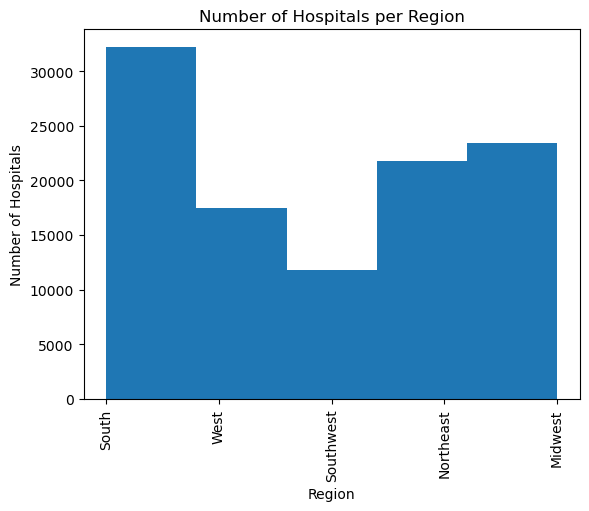

<Figure size 12000x12000 with 0 Axes>

In [8]:
histogram(region_table, 'Region', 5, "Region", "Number of Hospitals", "Number of Hospitals per Region")

*Distribution of Average Cost per Region* 

In [9]:
# converting
for row in range(region_table.row_count()):
    s = region_table[row]["Average Total Payments "]
    s = s.replace("$", "")
    s = region_table.convert_numeric(s)
    region_table[row]["Average Total Payments "] = s

In [10]:
# partition on state annd create averages
p_list = partition(region_table, ["Region"])

In [11]:
label = []
d = []
for p in p_list:
    vals = []
    name = p[0]["Region"]
    label.append(name)
    d.append(mean(p, "Average Total Payments "))
hospital_avg_prices_region = DataTable(['Region', 'Average Total Payments '])
for s in range(len(label)):
    hospital_avg_prices_region.append([label[s], d[s]])
print(hospital_avg_prices_region)

Region       Average Total Payments
---------  -------------------------
South                        8808.2
West                        11641.6
Southwest                    9260.86
Northeast                   10592.9
Midwest                      9289.14


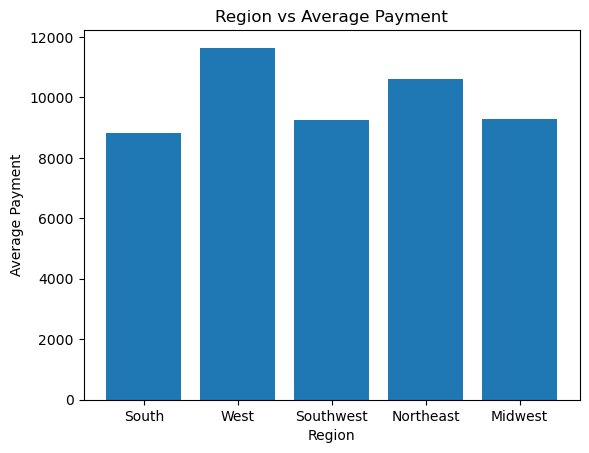

In [12]:
bar_chart(column_values(hospital_avg_prices_region, "Region"), column_values(hospital_avg_prices_region, "Average Total Payments "), "Region", "Average Payment", "Region vs Average Payment")

*Clusters of Average Payment per State*

> Will be using 7 clusters

In [13]:
state_dict = {}
dist_vals = distinct_values(region_table, "State")
for val in range(len(dist_vals)):
    state_dict[dist_vals[val]] = val

for row in region_table:
    row["State"] = state_dict[row["State"]]

label = []
d = []
p_list = partition(region_table, ["State"])
for p in p_list:
    vals = []
    name = p[0]["State"]
    label.append(name)
    d.append(mean(p, "Average Total Payments "))
hospital_avg_prices_state = DataTable(['State', 'Average Total Payments '])
for s in range(len(label)):
    hospital_avg_prices_state.append([label[s], d[s]])


In [14]:
centroids = select_k_random_centroids(hospital_avg_prices_state, 5)
clusters = k_means(hospital_avg_prices_state, centroids, ["State", "Average Total Payments "])
two_tss = tss(clusters, ['State', 'Average Total Payments '])
print(two_tss)

[633816.335084265, 6132783.806235194, 220330.4435913842, 263556.20873681677, 1035009.316574938]


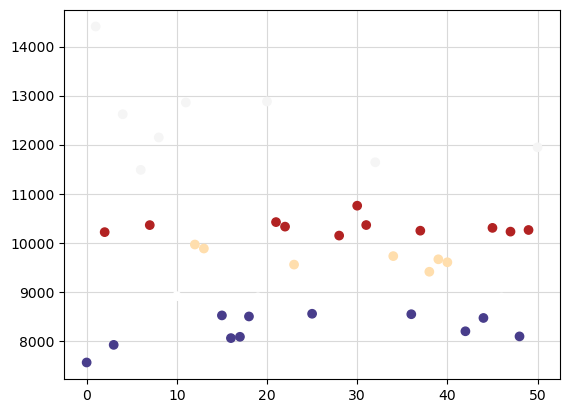

In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.figure()
plt.grid(color='0.85', zorder=0)

colors = list(mcolors.CSS4_COLORS.values())
shuffle(colors)
for c in range(len(clusters)):
   plt.scatter(column_values(clusters[c], 'State'), 
            column_values(clusters[c], 'Average Total Payments '), 
            c=colors[c], linestyle='', zorder=3)
plt.show()
plt.close()

For developing my classifiers I will be using the columns Hospital name, Hospital Ownership, Hospital Type and Average Total Payments to predic the region in which a hospital is. This is because I believe this will have the highest corelation in predicting the region since cost rating and ownership vary by region.

The types of classifiers I will be using will be KNN, Naive Bayes, Decision Trees, and Random Forests.

# Data Cleaning and Preprocessing

3. Cleaning

* Dropping unecessary attributes

In [16]:
combined_table.drop(['Hospital Referral Region Description', 'Total Discharges', 'Average Covered Charges','Average Medicare Payments',
                     'Provider Id', 'County Name', 'Phone Number', 'Emergency Services', 
                     'Meets criteria for meaningful use of EHRs','Hospital overall rating footnote', 'Mortality national comparison', 
                     'Mortality national comparison footnote', 'Safety of care national comparison', 'Safety of care national comparison footnote', 
                     'Readmission national comparison', 'Readmission national comparison footnote', 'Patient experience national comparison', 
                     'Patient experience national comparison footnote', 'Effectiveness of care national comparison', 
                     'Effectiveness of care national comparison footnote', 'Timeliness of care national comparison', 'Timeliness of care national comparison footnote', 
                     'Efficient use of medical imaging national comparison', 'Efficient use of medical imaging national comparison footnote', 'ZIP Code',
                    "Address", "Provider ID", "City"])
print(combined_table.columns())

['DRG Definition', 'Hospital Name', 'State', 'Average Total Payments ', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating']


* Remove Rows with Missing values in the overall rating section

In [17]:
for row in range(combined_table.row_count()):
    if combined_table[row]['Hospital overall rating'] == 'Not Available':
        combined_table[row]['Hospital overall rating'] = ''
cleaned_table = remove_missing(combined_table, ['Hospital overall rating'])

* Replace missing values in the average total payment section

In [18]:
# convert numeric
for row in range(cleaned_table.row_count()):
    temp = cleaned_table[row]['Average Total Payments ']
    temp = temp.replace('$', '')
    num = cleaned_table.convert_numeric(temp)
    cleaned_table[row]['Average Total Payments '] = num
# replace with average in the state
avg = lambda xs : None if not len(xs) else sum(xs) / len(xs)
cleaned_table = replace_missing(cleaned_table, 'Average Total Payments ', ['State'], avg)

* Normalize Average Payments

In [19]:
normalize(cleaned_table, "Average Total Payments ")

3. Creating Region Attribute and dropping the state attribute

    > I am dropping the state attribute since there are too many different states to predict making it incredibly difficult to predict using a classifier. So dropping it and replacing it with region gives my classification approach more of a chance to predict it. Since instead of 50 different values to choose from it now has 5. 

* Creating region attribute

In [20]:
state_to_region_dict = {
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'NV': 'West',
    'ID': 'West', 'MT': 'West', 'WY': 'West', 'UT': 'West',
    'CO': 'West', 'AK': 'West', 'HI': 'West', 'ME': 'Northeast',
    'VT': 'Northeast', 'NY': 'Northeast', 'NH': 'Northeast',
    'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NJ': 'Northeast', 'PA': 'Northeast', 'ND': 'Midwest',
    'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest',
    'IL': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest',
    'WV': 'South', 'DC': 'South', 'MD': 'South',
    'VA': 'South', 'KY': 'South', 'TN': 'South', 'NC': 'South',
    'MS': 'South', 'AR': 'South', 'LA': 'South', 'AL': 'South',
    'GA': 'South', 'SC': 'South', 'FL': 'South', 'DE': 'South',
    'AZ': 'Southwest', 'NM': 'Southwest', 'OK': 'Southwest',
    'TX': 'Southwest'}
temp = cleaned_table.columns()
temp.append('Region')
hospital_region_table = DataTable(temp)
for row in range(cleaned_table.row_count()):
    state = cleaned_table[row]['State']
    region = state_to_region_dict[state]
    row = cleaned_table[row].values()
    row.append(region)
    hospital_region_table.append(row)

* Dropping State Attribute

In [21]:
hospital_region_table.drop(['State'])

In [22]:
hospital_region_table.drop(['DRG Definition'])

In [23]:
print(hospital_region_table.rows(x for x in range(10)))

Hospital Name                       Average Total Payments   Hospital Type         Hospital Ownership                             Hospital overall rating  Region
--------------------------------  -------------------------  --------------------  -------------------------------------------  -------------------------  --------
SOUTHEAST ALABAMA MEDICAL CENTER                  0.0225611  Acute Care Hospitals  Government - Hospital District or Authority                          3  South
SOUTHEAST ALABAMA MEDICAL CENTER                  0.0161431  Acute Care Hospitals  Government - Hospital District or Authority                          3  South
SOUTHEAST ALABAMA MEDICAL CENTER                  0.0551453  Acute Care Hospitals  Government - Hospital District or Authority                          3  South
SOUTHEAST ALABAMA MEDICAL CENTER                  0.0281214  Acute Care Hospitals  Government - Hospital District or Authority                          3  South
SOUTHEAST ALABAMA MEDICAL CENT

# Classifier Development

Since this data set is so large (106 thousand rows), I will have to greatly diminish the size of the table in order for my classification techniques to run in a reasonable amount of time. So, I will create a smaller data set of around 20 thousand rows for my decision trees then around 2 thousand for my knn and naive bayes, since they are a lot slower than the trees. The distribution of the regions will match that of the original data set. I will be completing this by using the stratify holdout method to return a set that has the same distribution of region values.

In [24]:
temp_set, classification_sample_table = stratified_holdout(hospital_region_table, ['Region'], 20000)

In [25]:
print(classification_sample_table.rows([randint(0, classification_sample_table.row_count() - 1) for x in range(15)]))

Hospital Name                            Average Total Payments   Hospital Type         Hospital Ownership                Hospital overall rating  Region
-------------------------------------  -------------------------  --------------------  ------------------------------  -------------------------  ---------
ST VINCENT'S MEDICAL CENTER SOUTHSIDE                 0.0494251   Acute Care Hospitals  Voluntary non-profit - Private                          3  South
HIGHLINE MEDICAL CENTER                               0.037156    Acute Care Hospitals  Voluntary non-profit - Private                          3  West
YORK HOSPITAL                                         0.0739414   Acute Care Hospitals  Voluntary non-profit - Private                          3  Northeast
AURORA ST LUKES MEDICAL CENTER                        0.0224884   Acute Care Hospitals  Voluntary non-profit - Private                          4  Midwest
MT SINAI HOSPITAL MEDICAL CENTER                      0.0982759   Acute 

### Decision Trees
> Since my implementation of decision trees doesnt use continuous data, I will not be using the "Average total payments" attribute

In [26]:
training, test = stratified_holdout(classification_sample_table, ['Region'], classification_sample_table.row_count() // 3)

In [27]:
print(classification_sample_table.columns())

['Hospital Name', 'Average Total Payments ', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating', 'Region']


In [28]:
tree = tdidt_eval(training, test, 'Region', ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

Number values not in tree 92


Accuracy of Tree

In [29]:
print(tree)
print(test.row_count(), " Rows in teh test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in tree.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(tree, val)
        precision_sum += precision(tree, val)
        recall_sum += recall(tree, val)
avg_accuracy = accuracy_sum / (tree.column_count() - 1)
avg_precision = precision_sum / (tree.column_count() - 1)
avg_recall = recall_sum / (tree.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)


actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South         1921       2            6            6          6
West             0    1054            0           28         10
Southwest       11       6          684            0          6
Northeast        8      11            0         1348          3
Midwest          5      43            0            5       1409
6664  Rows in teh test set
Average accuracy =  0.9905051734631771
Average Precision =  0.9755714936200242
Macro Average F-measure =  0.9747906793141488
Average Recall =  0.9740111138832447


While this tree has a very good accuracy when predicting regions it however was unable to predict 80 rows of the 6,664 rows it tested. 

### Random Forests

> I will be using  F = 4, M = 3, N = 30 to predict the region in which an unknown hospital is. This will select all of the columns in the training set, then the 3 most accurate trees it creates from a total of 50 trees created Then since my implementation of decision trees doesnt use continuous data, I will not be using the "Average total payments" attribute

In [32]:
forest = random_forest_eval(classification_sample_table, training, test, 4, 3, 50, "Region", ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [34]:
print(forest)
print(test.row_count(), " Rows in the test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in tree.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(forest, val)
        precision_sum += precision(forest, val)
        recall_sum += recall(forest, val)
avg_accuracy = accuracy_sum / (forest.column_count() - 1)
avg_precision = precision_sum / (forest.column_count() - 1)
avg_recall = recall_sum / (forest.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South         1966       0            0            0          0
West          1102       0            0            0          0
Southwest      737       0            0            0          0
Northeast     1375       0            0            0          0
Midwest       1484       0            0            0          0
6664  Rows in the test set
Average accuracy =  0.7180072028811525
Average Precision =  0.059003601440576224
Macro Average F-measure =  0.09112398609501739
Average Recall =  0.2


Here you can see that the forest performed very very poorly when trying to predict the region. I beleive that this is due to the fact that the forest tends to create trees that are overfitted to the training set. Meaning that even though it is accurate when predicting its particular training and test set it might not bee good at predicitng the overall testing set since it is overfitted. So, when the forest selects the 3 most accurate trees it selects those which are actually very poor in predicting new instances

### KNN
> Here I am going to create an even smaller sample of the actual table since the cost of computing KNN is very high. So I will be using the same method as before but will be creating a sample set of around 2000 instances.

For KNN itself I will be using the 5 closest neighbors with majority voting

In [35]:
temp_set, knn_sample_table = stratified_holdout(hospital_region_table, ['Region'], 2000)

In [36]:
knn_train, knn_test = holdout(knn_sample_table, knn_sample_table.row_count() // 5)

In [38]:
knn_matrix = knn_eval(knn_train, knn_test, majority_vote, 5, 'Region', ['Average Total Payments '], ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [39]:
print(knn_matrix)
print(knn_test.row_count(), " Rows in the test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in tree.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(knn_matrix, val)
        precision_sum += precision(knn_matrix, val)
        recall_sum += recall(knn_matrix, val)
avg_accuracy = accuracy_sum / (knn_matrix.column_count() - 1)
avg_precision = precision_sum / (knn_matrix.column_count() - 1)
avg_recall = recall_sum / (knn_matrix.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South           86       6            4           14         14
West            12      27           10            6         10
Southwest       17       4           17            6          5
Northeast       17       4            1           48          7
Midwest         18       4            2            7         53
399  Rows in the test set
Average accuracy =  0.8315789473684211
Average Precision =  0.5722863087806908
Macro Average F-measure =  0.5567527471145715
Average Recall =  0.5420401564641196


### KNN Stratified
Now I will be using KNN Stratified with 4 folds and the same sample set as the previous knn with the 5 nearest neighbors

In [44]:
knn_strat_matrix = knn_stratified(knn_sample_table, 4, 'Region', majority_vote, 5, ['Average Total Payments '], ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [47]:
print(knn_strat_matrix)
print(knn_sample_table.row_count(), " Rows in table")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in tree.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(knn_strat_matrix, val)
        precision_sum += precision(knn_strat_matrix, val)
        recall_sum += recall(knn_strat_matrix, val)
avg_accuracy = accuracy_sum / (knn_strat_matrix.column_count() - 1)
avg_precision = precision_sum / (knn_strat_matrix.column_count() - 1)
avg_recall = recall_sum / (knn_strat_matrix.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South          542       6            7           17         17
West            24     259           11           15         21
Southwest       27      10          165            6         13
Northeast       25      11            3          362         11
Midwest         29      12            3           11        390
1997  Rows in table
Average accuracy =  0.9441161742613922
Average Precision =  0.8646932712658402
Macro Average F-measure =  0.8528571915361681
Average Recall =  0.8413407651830955


### Naive Bayes
> Here I will be using the Naive Bayes algorithm with the same test and training sets as KNN since Naive is even more expensive than KNN

In [42]:
naive_matrix = naive_bayes_eval(knn_train, knn_test, 'Region', ['Average Total Payments '], ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [43]:
print(naive_matrix)
print(knn_test.row_count(), " Rows in the test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in tree.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(naive_matrix, val)
        precision_sum += precision(naive_matrix, val)
        recall_sum += recall(naive_matrix, val)
avg_accuracy = accuracy_sum / (naive_matrix.column_count() - 1)
avg_precision = precision_sum / (naive_matrix.column_count() - 1)
avg_recall = recall_sum / (naive_matrix.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South          118       0            0            6          0
West            59       0            0            5          1
Southwest       47       0            0            2          0
Northeast       61       0            0           16          0
Midwest         79       0            0            4          1
399  Rows in the test set
Average accuracy =  0.7353383458646616
Average Precision =  0.2618048618048618
Macro Average F-measure =  0.24726879276444189
Average Recall =  0.23426197458455525


### Naive Bayes Stratified
> Here I will be using 4 folds for my stratified naive bayes algorithm

In [48]:
naive_strat_matrix = naive_bayes_stratified(knn_sample_table, 4, "Region", ['Average Total Payments '], ['Hospital Name', 'Hospital Type', 'Hospital Ownership', 'Hospital overall rating'])

In [49]:
print(naive_strat_matrix)
print(knn_test.row_count(), " Rows in the test set")
accuracy_sum = 0
precision_sum = 0
recall_sum = 0
for val in tree.columns():
    if not(val == 'actual'):
        accuracy_sum += accuracy(naive_strat_matrix, val)
        precision_sum += precision(naive_strat_matrix, val)
        recall_sum += recall(naive_strat_matrix, val)
avg_accuracy = accuracy_sum / (naive_strat_matrix.column_count() - 1)
avg_precision = precision_sum / (naive_strat_matrix.column_count() - 1)
avg_recall = recall_sum / (naive_strat_matrix.column_count() - 1)
f_measure = ((2 * avg_recall) * (avg_precision)) / (avg_recall + avg_precision)
print("Average accuracy = ", avg_accuracy)
print("Average Precision = ", avg_precision)
print("Macro Average F-measure = ", f_measure)
print("Average Recall = ", avg_recall)

actual       South    West    Southwest    Northeast    Midwest
---------  -------  ------  -----------  -----------  ---------
South          548       0            0           40          1
West           289       5            0           36          0
Southwest      203       0            0           18          0
Northeast      367       0            0           45          0
Midwest        399       0            0           44          2
399  Rows in the test set
Average accuracy =  0.7201802704056084
Average Precision =  0.44320026142366975
Macro Average F-measure =  0.2866728313181576
Average Recall =  0.21185193810095856
